**AVIJIT PAUL**
**ID: 18-37556-1**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


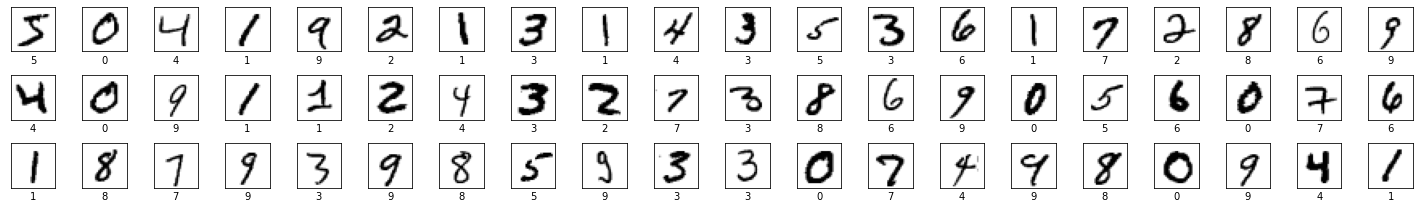

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

**Data normalized below, where image data is divided by 255**

In [5]:
#reshape
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train, x_test = x_train / 255.0, x_test / 255.0   #normalized

**Data not normalized below**

No image data is divided. 

In [6]:
# #reshape
# x_train=x_train.reshape(-1,28,28,1)
# x_test=x_test.reshape(-1,28,28,1)  # not normalized

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(28,28) output->(24,24)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

**Adam**

*By using adam and with data normalization, after 10 epochs, I got 99.58% accuracy and value accuracy of 98.83%.*

And with test samples 98.79%

In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

**SGD**

In [9]:
# model.compile(
#     optimizer='SGD', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

**RMSProp**

In [10]:
# model.compile(
#     optimizer='RMSProp', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
# )

In [11]:
h = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32) #adam with normalized data

Epoch 1/10
1500/1500 [==============================] - 36s 3ms/step - loss: 0.2095 - accuracy: 0.9350 - val_loss: 0.0718 - val_accuracy: 0.9790
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0569 - val_accuracy: 0.9842
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0605 - val_accuracy: 0.9814
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0473 - val_accuracy: 0.9862
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0588 - val_accuracy: 0.9837
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0557 - val_accuracy: 0.9862
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0539 - val_accuracy

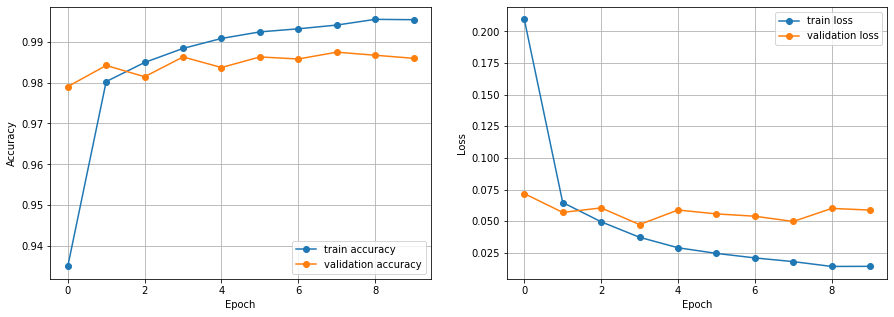

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Testing and Evaluating Model

Got accuracy of 98.79% and Test Loss: 4.9%

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9879

Test Accuracy: 0.9879000186920166

Test Loss: 0.049677055329084396


In [14]:
predictions = model.predict(x_test)

In [21]:
predictions[15]

array([1.67138230e-11, 4.67544004e-09, 1.50684160e-10, 3.24168695e-06,
       2.23930995e-11, 9.99996185e-01, 1.36976652e-07, 8.05979034e-11,
       1.18949174e-07, 3.76759260e-07], dtype=float32)

In [22]:
np.argmax(predictions[15])

5

#Reshape and images again to original form and Display

In [17]:

x_train=x_train=x_train.reshape(-1,28,28)
x_test=x_test=x_test.reshape(-1,28,28)

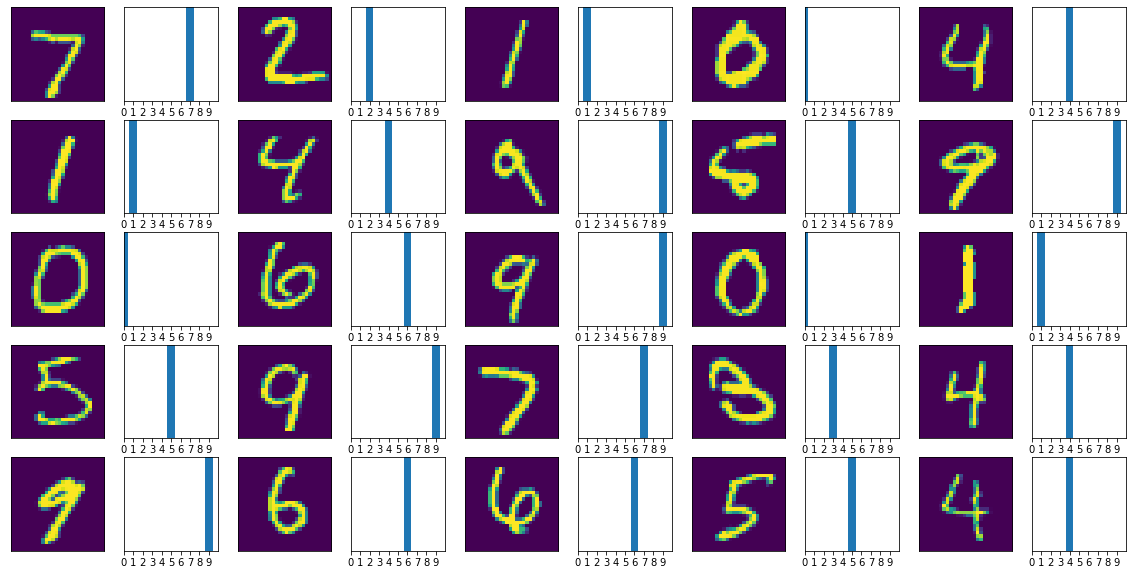

In [18]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()


#Analyzation of the effect of using and not using data normalization

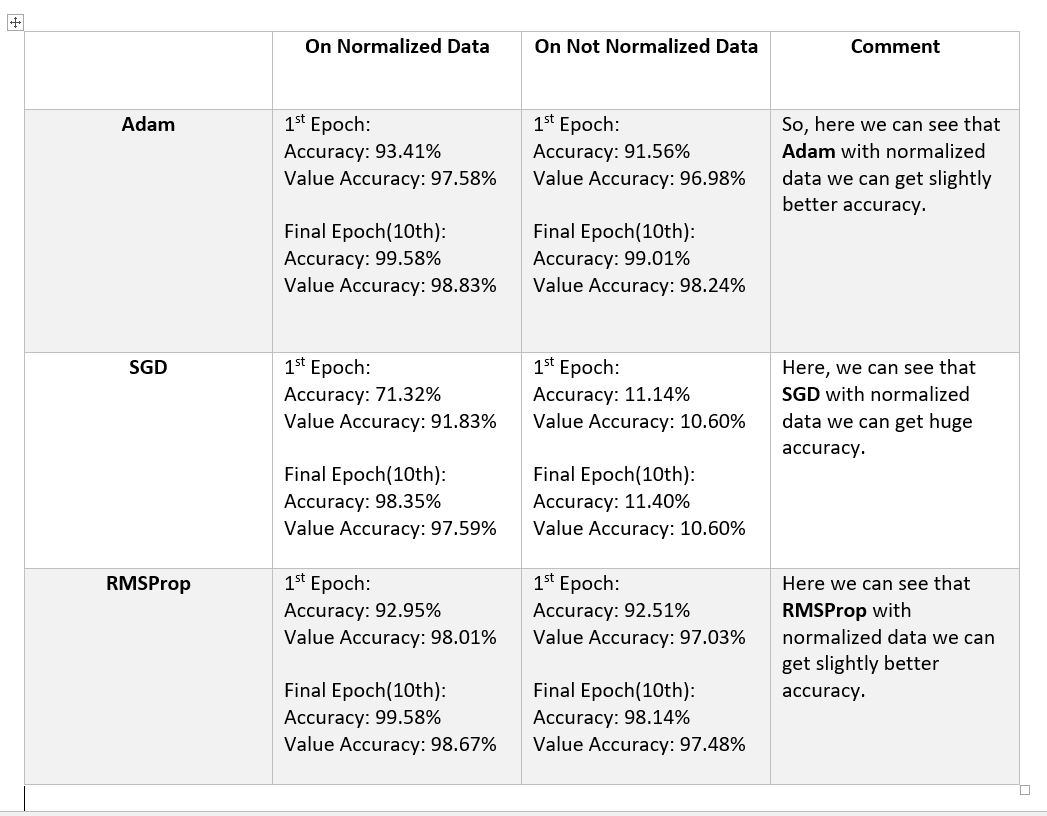